# EDA_조이라이더스

## 라이브러리, CSV import

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 날씨 데이터를 import
# 따로 import 다시 할거면 reset_file() 실행하지 말 것
from weather import CSVImporter as WeatherImporter
WeatherImporter.reset_file()
from pollution import CSVImporter as PollutionImporter
PollutionImporter.reset_file()
from accident import CSVImporter as AccidentImporter
AccidentImporter.reset_file()


In [3]:
# 로컬 파일 제거
WeatherImporter.reset_file()
PollutionImporter.reset_file()
AccidentImporter.reset_file()

In [4]:
# 1년 중 며칠째인지, 무슨 요일인지 추가해주는 함수
weekday_labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
def advanced_day(df: pd.DataFrame) -> pd.DataFrame:
    head = ["year", "month", "day"]
    new_cols = ["day_of_year", "weekday"]
    tail = [k for k in df.columns if k not in head]
    temp = pd.to_datetime(df[head])
    df[new_cols[0]] = temp.dt.dayofyear
    df[new_cols[1]] = temp.dt.weekday

    sorted_columns = head + new_cols + tail
    df = df[sorted_columns]
    return df

## Weather 데이터 분석

[데이터 출처: Kaggle](https://www.kaggle.com/datasets/alfredkondoro/seoul-historical-weather-data-2024)

In [5]:
WeatherImporter.reset_file()

In [6]:
csv_names = [
    "seoul 1994-01-01 to 1996-01-01",
    "seoul 1996-01-01 to 1998-01-01"
]

In [7]:
csv_names = []
a = 1994
b = 1996
for _ in range(94, 124, 2):
    csv_names.append(f"seoul {a}-01-01 to {b}-01-01.csv")
    a += 2
    b += 2

In [8]:
# import할 파일명을 바꾸고 싶은 경우 reset_file() 실행
weather_df = WeatherImporter.import_raw(csv_names)
weather_df = advanced_day(weather_df)

weather_df.head()

,year,month,day,day_of_year,weekday,temp,humidity,cloudy,precip,snow,windspeed,winddir,sealevelpressure,visibility,solarradiation
0,1994,1,1,1,5,26.3,65.9,1,0.000,0.0,5.5,115.4,1025.4,6.6,0.0
1,1994,1,2,2,6,36.2,72.1,1,0.000,0.0,9.1,181.7,1022.2,6.9,0.0
2,1994,1,3,3,0,38.0,68.1,1,0.000,0.0,12.8,289.5,1020.0,5.3,0.0
3,1994,1,4,4,1,30.1,51.2,0,0.000,0.0,11.7,301.9,1025.1,7.3,0.0
4,1994,1,5,5,2,33.1,63.9,3,0.011,0.0,6.8,134.1,1023.9,6.2,0.0


<Axes: >

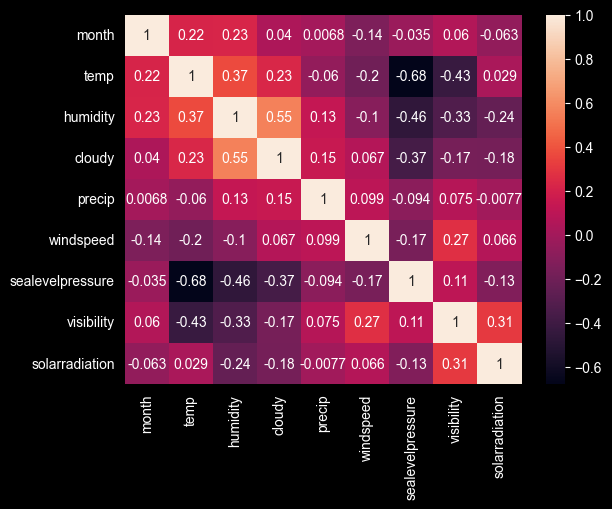

In [9]:
target_cols = ['month', 'temp', 'humidity', 'cloudy', 'precip', 'windspeed', 'sealevelpressure', 'visibility', 'solarradiation']
heat_df = weather_df[target_cols]
sns.heatmap(heat_df.corr(), annot=True)

## Pollution 데이터 분석

[데이터 출처: Kaggle](https://www.kaggle.com/datasets/williamhyun/seoulairqualityhistoricdata)

In [10]:
PollutionImporter.reset_file()

In [11]:
# 년도를 바꾸고 싶은 경우 reset_file() 실행
# -1, -1 하면 전체 기간
pollution_df = PollutionImporter.import_raw(-1, -1)
pollution_df = advanced_day(pollution_df)
pollution_df.head()

,year,month,day,day_of_year,weekday,so2,so2_level,no2,no2_level,co,co_level,o3,o3_level,pm10,pm10_level,pm2.5,pm2.5_level
0,1988,1,1,1,4,0.19,3,0.03,0,6.74,1,0.01,0,NaN,NaN,NaN,NaN
1,1988,1,2,2,5,0.15,2,0.03,0,4.33,1,0.01,0,NaN,NaN,NaN,NaN
2,1988,1,3,3,6,0.15,2,0.03,0,5.72,1,0.00,0,NaN,NaN,NaN,NaN
3,1988,1,4,4,0,0.12,2,0.03,0,3.30,1,0.01,0,NaN,NaN,NaN,NaN
4,1988,1,5,5,1,0.16,3,0.03,0,5.31,1,0.02,0,NaN,NaN,NaN,NaN


<Axes: >

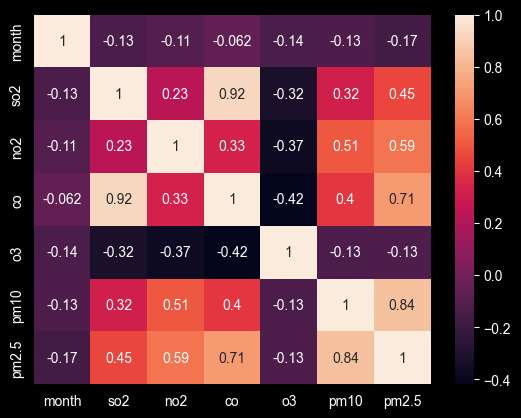

In [12]:
target_cols = ['month', 'so2', 'no2', 'co', 'o3', 'pm10', 'pm2.5']
heat_df = pollution_df[target_cols]
sns.heatmap(heat_df.corr(), annot=True)

## Accident 데이터 분석

[데이터 출처: Kaggle](https://www.kaggle.com/datasets/seventyfivebyte/seoul-daily-hourly-traffic-accident-status)

In [13]:
AccidentImporter.reset_file()

In [14]:
accident_df = AccidentImporter.import_csv()
accident_df = advanced_day(accident_df)
accident_df.head()

,year,month,day,day_of_year,weekday,accident_cnt,death,fatal,injured,death_rate(%),fatal_rate(%)
0,2017,1,1,1,6,73,2,25,90,2.74,34.25
1,2017,1,2,2,0,82,4,27,92,4.88,32.93
2,2017,1,3,3,1,88,1,25,80,1.14,28.41
3,2017,1,4,4,2,115,1,39,99,0.87,33.91
4,2017,1,5,5,3,103,1,34,111,0.97,33.01


<Axes: >

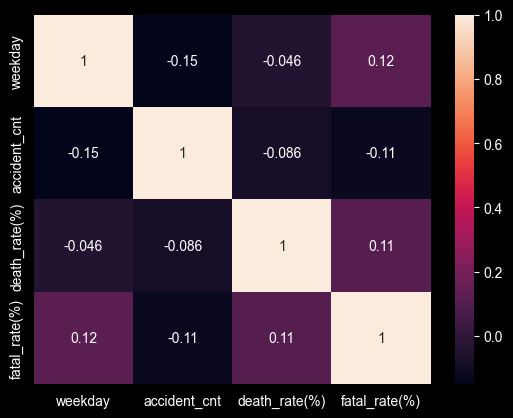

In [15]:
target_cols = ["weekday", "accident_cnt", 'death_rate(%)', 'fatal_rate(%)']
heat_df = accident_df[target_cols]
sns.heatmap(heat_df.corr(), annot=True)

## 연관 데이터 분석

In [16]:
# 전처리된 데이터프레임들을 import
df_prep_weather = WeatherImporter.import_csv()
df_prep_pollution = PollutionImporter.import_csv()
df_prep_accident = AccidentImporter.import_csv()

# 3개의 DataFrame을 join
keys = ["year", "month", "day"]
df_merged = pd.merge(df_prep_weather, df_prep_pollution, on=keys, how="inner")
df_merged = pd.merge(df_merged, df_prep_accident, on=keys, how="inner")

# day_of_year과 weekday 더함
df_merged = advanced_day(df_merged)
df_merged.head()

,year,month,day,day_of_year,weekday,temp,humidity,cloudy,precip,snow,...,pm10,pm10_level,pm2.5,pm2.5_level,accident_cnt,death,fatal,injured,death_rate(%),fatal_rate(%)
0,2017,1,1,1,6,36.9,72.0,1,0.000,0.0,...,77.33,1,56.78,2,73,2,25,90,2.74,34.25
1,2017,1,2,2,0,41.6,73.6,1,0.012,0.0,...,110.66,2,78.61,3,82,4,27,92,4.88,32.93
2,2017,1,3,3,1,34.5,63.6,0,0.000,0.0,...,78.60,1,51.50,2,88,1,25,80,1.14,28.41
3,2017,1,4,4,2,37.3,60.1,1,0.000,0.0,...,54.88,1,34.36,1,115,1,39,99,0.87,33.91
4,2017,1,5,5,3,38.0,53.5,1,0.000,0.0,...,35.85,1,22.22,1,103,1,34,111,0.97,33.01


<Axes: >

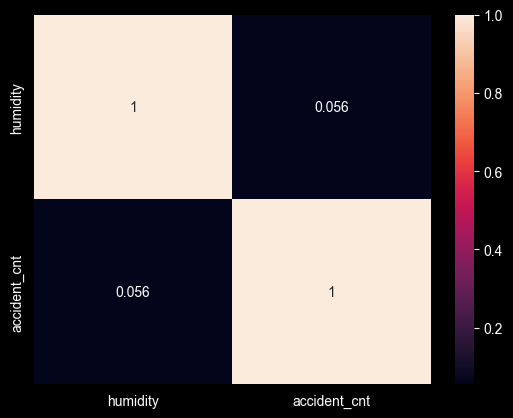

In [17]:
target_cols = ["humidity", "accident_cnt"]

corr_dat = df_merged[target_cols].corr()
sns.heatmap(corr_dat, annot=True)